In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # statistical data visualization
from sympy.ntheory.primetest import isprime

## Loading data 
Chargement des données et ajout d'une colonne indiquant si le numéro de la ville est un nombre premier

In [2]:
cities = pd.read_csv('../input/cities.csv')
cities['IsPrime'] = cities['CityId'].apply(isprime)
cities.tail()

,CityId,X,Y,IsPrime
197764,197764,149.828018,3134.756986,False
197765,197765,2615.299239,2267.979286,False
197766,197766,4775.889874,3103.846228,False
197767,197767,2994.230955,1931.764344,True
197768,197768,1354.764778,3218.100625,False


In [3]:
# Taille des mailles pour afficher un quadrillage de N*N où N = fineness
# Number of cells along one axis
fineness = 20
# min(cities.X) = 1.87, min(cities.Y)=0.0, too small to be taken into account
cell_width  = int(max(cities.X)/fineness)
cell_height = int(max(cities.Y)/fineness)
print('Block size [x,y]: ', [cell_width, cell_height])

Block size [x,y]:  [254, 169]


In [4]:
# Densité des nombres premiers dans chaque cellule du quadrillage
heat_matrix = []
for i in range(fineness):
    for j in range(fineness):
        cell = cities[(cities.X> (i*cell_width)) &  (cities.X<((i+1)*cell_width))
                      & (cities.Y>(j*cell_height)) &  (cities.Y<((j+1)*cell_height))  ]
        population = int(len(cell))
        density = 0
        if population > 0:
            density    = int( round(len(cell[cell.IsPrime]) / population * 100))
        heat_matrix.append( (i , j , population , density) )

# Préparation du Dataframe pour l'affichage
heat= pd.DataFrame(heat_matrix, columns=['x','y','population','density'])
heat['_fineness-1-y'] = heat['y'].apply(lambda val: fineness-val-1)

In [5]:
# heat.tail()

## Prime density

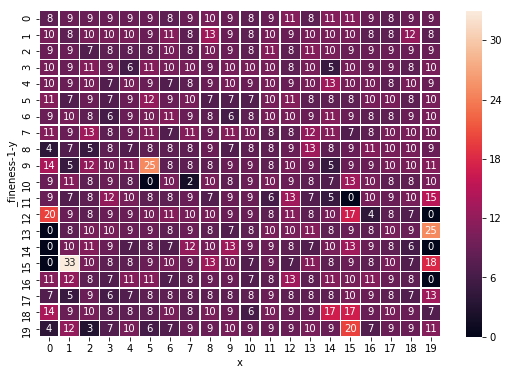

In [6]:
#sns.set()
heat_ = heat.pivot('_fineness-1-y','x','density')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heat_, annot=True, fmt="d", linewidths=.5, ax=ax)

## Population density

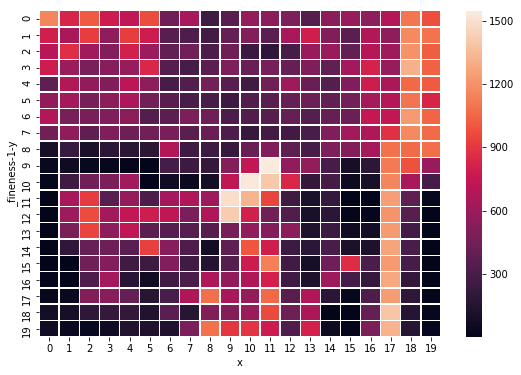

In [7]:
heat_ = heat.pivot('_fineness-1-y','x','population')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heat_, annot=False, fmt="d", linewidths=.5, ax=ax)

## Relevant prime density
population of a cell > 300

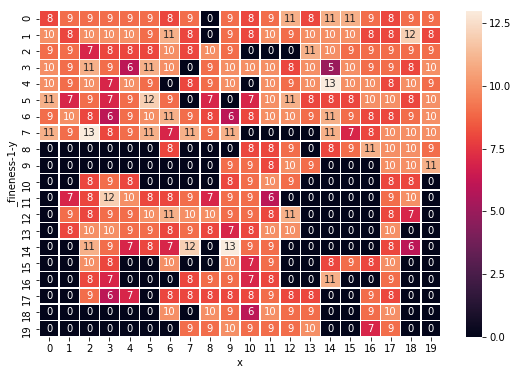

In [8]:
# Densité des nombres premiers dans chaque cellule du quadrillage
heat_matrix = []
for i in range(fineness):
    for j in range(fineness):
        cell = cities[(cities.X> (i*cell_width)) &  (cities.X<((i+1)*cell_width))
                      & (cities.Y>(j*cell_height)) &  (cities.Y<((j+1)*cell_height))  ]
        population = int(len(cell))
        density = 0
        if population > 300:
            density    = int( round(len(cell[cell.IsPrime]) / population * 100))
        heat_matrix.append( (i , j , population , density) )

# Préparation du Dataframe pour l'affichage
heat= pd.DataFrame(heat_matrix, columns=['x','y','population','density'])
heat['_fineness-1-y'] = heat['y'].apply(lambda val: fineness-val-1)

heat_ = heat.pivot('_fineness-1-y','x','density')
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heat_, annot=True, fmt="d", linewidths=.5, ax=ax)